# Setp 0: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setp 1: Load Dataset

In [4]:
df = pd.read_csv("vgsales-12-4-2019.csv")

In [5]:
df3 = df.copy()

# Setp 2: Clean Dataset

### A. Columns

### To Call specified columns
df.columns =['Rank','Name','basename','basename','Genre', ....]

### To Drop specified columns
df2.drop( columns = ['img_url','NA_Sales','PAL_Sales','JP_Sales', ....], inplace=True )

In [6]:
# Drop these columns

df3.drop( columns = ['ESRB_Rating','VGChartz_Score','Critic_Score','User_Score',
                     'Total_Shipped','Global_Sales','NA_Sales','PAL_Sales',
                     'JP_Sales','Other_Sales','Year',
                     'Last_Update','url','Vgchartzscore','img_url'], inplace=True )

In [7]:
# To make the columns lower case

df3.columns = df3.columns.str.lower()

In [8]:
# To show columns after modify

df3.columns

Index(['rank', 'name', 'basename', 'genre', 'platform', 'publisher',
       'developer', 'status'],
      dtype='object')

### B. Rows (Cells)

In [9]:
# To check duplicate rows

print('The count of duplicated is: ' , df.duplicated().sum())

The count of duplicated is:  0


In [10]:
# To shape DataFream

df3.shape

(55792, 8)

In [11]:
df3.isna().sum()

rank          0
name          0
basename      0
genre         0
platform      0
publisher     0
developer    17
status        0
dtype: int64

In [12]:
# To Drop null value

df3 = df3.replace([ ' ','NaN', 'Na','NA', '#', '?', '/'], np.nan)

In [13]:
# To Drop null value 

df3.dropna(inplace= True )

In [14]:
# To check the missing value by %

(df3.isna().sum()/df3.shape[0])*100
#print('{:.2f}',(df3.isna().sum()/df3.shape[0])*100)

rank         0.0
name         0.0
basename     0.0
genre        0.0
platform     0.0
publisher    0.0
developer    0.0
status       0.0
dtype: float64

In [15]:
# To check the missing value

df3.isna().sum()

rank         0
name         0
basename     0
genre        0
platform     0
publisher    0
developer    0
status       0
dtype: int64

In [16]:
df3.head(1)

,rank,name,basename,genre,platform,publisher,developer,status
0,1,Wii Sports,wii-sports,Sports,Wii,Nintendo,Nintendo EAD,1


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55775 entries, 0 to 55791
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rank       55775 non-null  int64 
 1   name       55775 non-null  object
 2   basename   55775 non-null  object
 3   genre      55775 non-null  object
 4   platform   55775 non-null  object
 5   publisher  55775 non-null  object
 6   developer  55775 non-null  object
 7   status     55775 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 3.8+ MB


In [18]:
df3.dtypes

rank          int64
name         object
basename     object
genre        object
platform     object
publisher    object
developer    object
status        int64
dtype: object

# Step 3 :EDA

The Target Column will be platform 

<AxesSubplot:xlabel='platform', ylabel='count'>

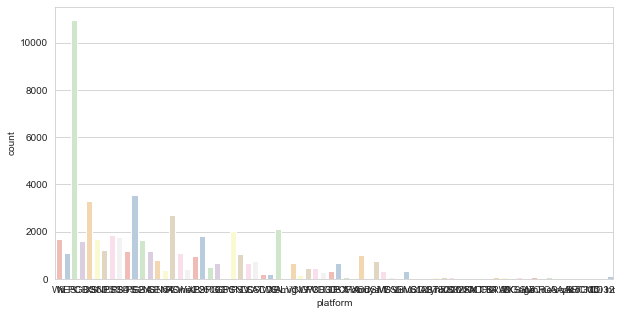

In [19]:
plt.figure(figsize=[10,5])
sns.set_style('whitegrid')
sns.countplot( x = 'platform', data = df3, palette = 'Pastel1' )

<AxesSubplot:xlabel='genre', ylabel='count'>

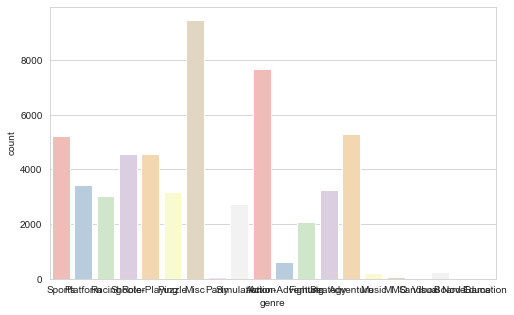

In [20]:
plt.figure(figsize=[8,5])
sns.set_style('whitegrid')
sns.countplot( x = 'genre', data = df3, palette = 'Pastel1' )

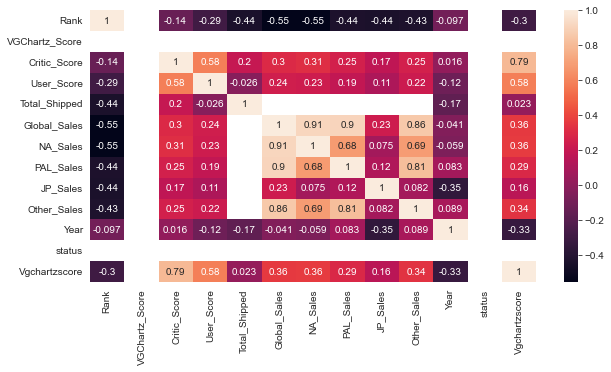

In [21]:
plt.figure(figsize=[10,5])
correct = df.corr()
sns.heatmap(correct, annot=True);

In [22]:
df3.describe

<bound method NDFrame.describe of         rank                           name                      basename  \
0          1                     Wii Sports                    wii-sports   
1          2              Super Mario Bros.              super-mario-bros   
2          3                 Mario Kart Wii                mario-kart-wii   
3          4  PlayerUnknown's Battlegrounds  playerunknowns-battlegrounds   
4          5              Wii Sports Resort             wii-sports-resort   
...      ...                            ...                           ...   
55787  55788                    Indivisible                   indivisible   
55788  55789                     Lost Ember                    lost-amber   
55789  55790                     Lost Ember                    lost-amber   
55790  55791                     Lost Ember                    lost-amber   
55791  55792                     Falcon Age                    falcon-age   

                  genre platform         

In [23]:
df3.platform.describe()

count     55775
unique       74
top          PC
freq      10966
Name: platform, dtype: object

In [24]:
df3.genre.describe()

count     55775
unique       20
top        Misc
freq       9473
Name: genre, dtype: object

# Step 4 :Model 

In [27]:
df4 = pd.get_dummies(df3.drop(columns = 'platform'), drop_first=True)

In [28]:
from sklearn.model_selection import train_test_split
# x = df3.drop( columns = df4 ) 
x = df4
y = df3.platform

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [1]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

NameError: name 'x_train' is not defined

In [2]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)

NameError: name 'x_train_scaled' is not defined

In [3]:
y_pred = lr.predict(x_test_scaled)

NameError: name 'x_test_scaled' is not defined

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

In [ ]:
# applay Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train_scaled,y_train)

In [ ]:
y_pred_rf= rf.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_rf,y_test))

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train_scaled,y_train)

In [ ]:
y_pred_knn = knn.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred_knn,y_test))